In [2]:
# Installing Libraries

import pandas as pd

In [3]:
trxn= pd.read_csv('Retail_Data_Transactions.csv')

In [4]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [73]:
df= trxn.merge(response, on='customer_id', how= 'left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [11]:
# Features

df.dtypes
df.shape
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [12]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


# Data Cleaning:

In [13]:
# Missing Values

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [76]:
# Dropping the null values: 
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [77]:
# Change the data types(dtypes):

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')
df

C:\Users\Windows\AppData\Local\Temp\ipykernel_11464\3266927771.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\Windows\AppData\Local\Temp\ipykernel_11464\3266927771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\Windows\AppData\Local\Temp\ipykernel_11464\3266927771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [80]:
set(df['response'])

{0, 1}

In [79]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [23]:
# Check for outliers
# Z-score

from scipy import stats
import numpy as np

# Calculate z score
z_scores= np.abs(stats.zscore(df['tran_amount']))

# set a threshold

threshold= 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [81]:
# Check for outliers
# Z-score

from scipy import stats
import numpy as np

# Calculate z score
z_scores= np.abs(stats.zscore(df['response']))

# set a threshold

threshold= 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


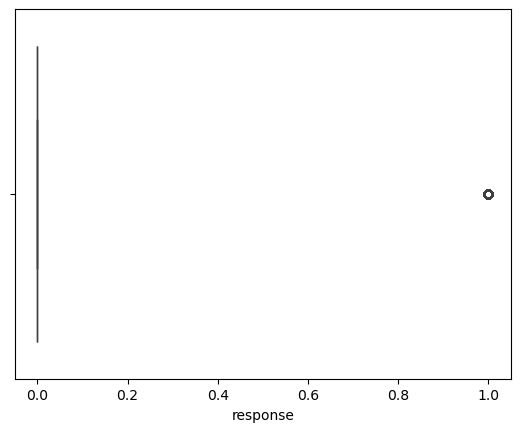

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

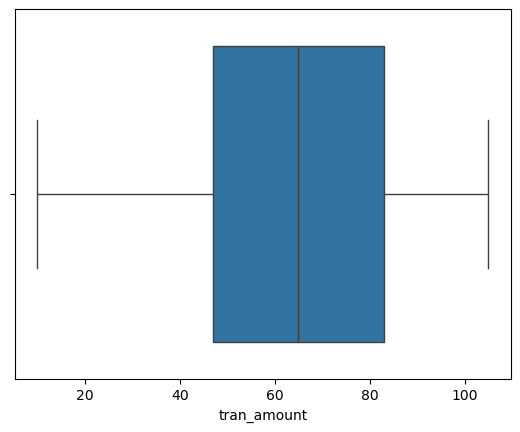

In [28]:
sns.boxplot(x=df['tran_amount'])
plt.show()

# Data Preparation:

In [82]:
# Creating new columns

df['month']= df['trans_date'].dt.month
df

C:\Users\Windows\AppData\Local\Temp\ipykernel_11464\3512116482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [62]:
# Which three month have the highest transaction amount?

monthly_sales= df.groupby('month')['tran_amount'].sum()
monthly_sales= monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales


,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [37]:
# Customers having highest number of orders

cust_counts= df['customer_id'].value_counts().reset_index()
cust_counts
# If you want to rename ethe columns:
cust_counts.columns= ['Cust_ID', 'Order_count']
cust_counts
# If we need top 5 customers with highest oders:
top_5_cust= cust_counts.sort_values(by='Order_count', ascending=False).head(5)
top_5_cust

,Cust_ID,Order_count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='Cust_ID', ylabel='Order_count'>

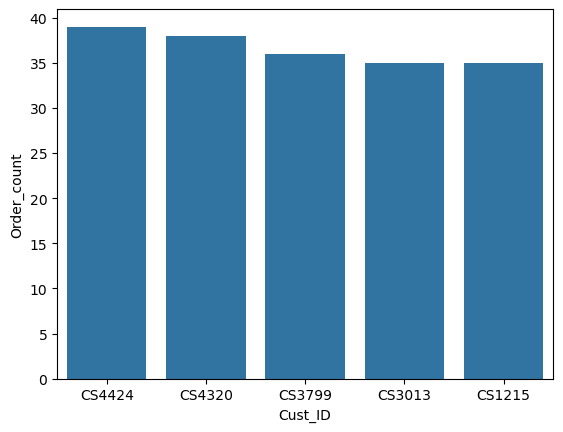

In [38]:
sns.barplot(x='Cust_ID',y='Order_count',data=top_5_cust)

In [45]:
# Customers having highest value of orders

cust_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
cust_sales

# If we need top 5 customers with highest oders:
top_5_sales= cust_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

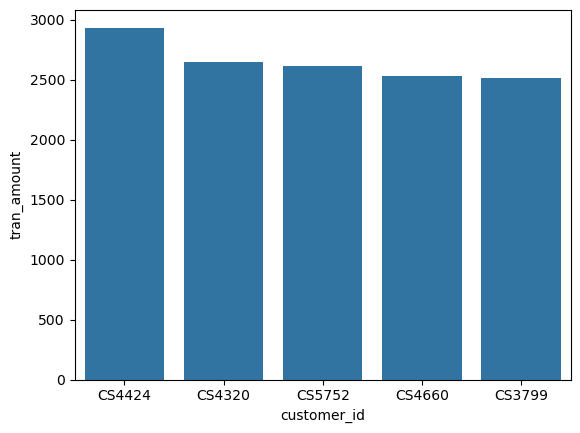

In [47]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sales)

# Advanced Analysis:

### Time series Analysis:

In [83]:
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('M')
df



C:\Users\Windows\AppData\Local\Temp\ipykernel_11464\3335647921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


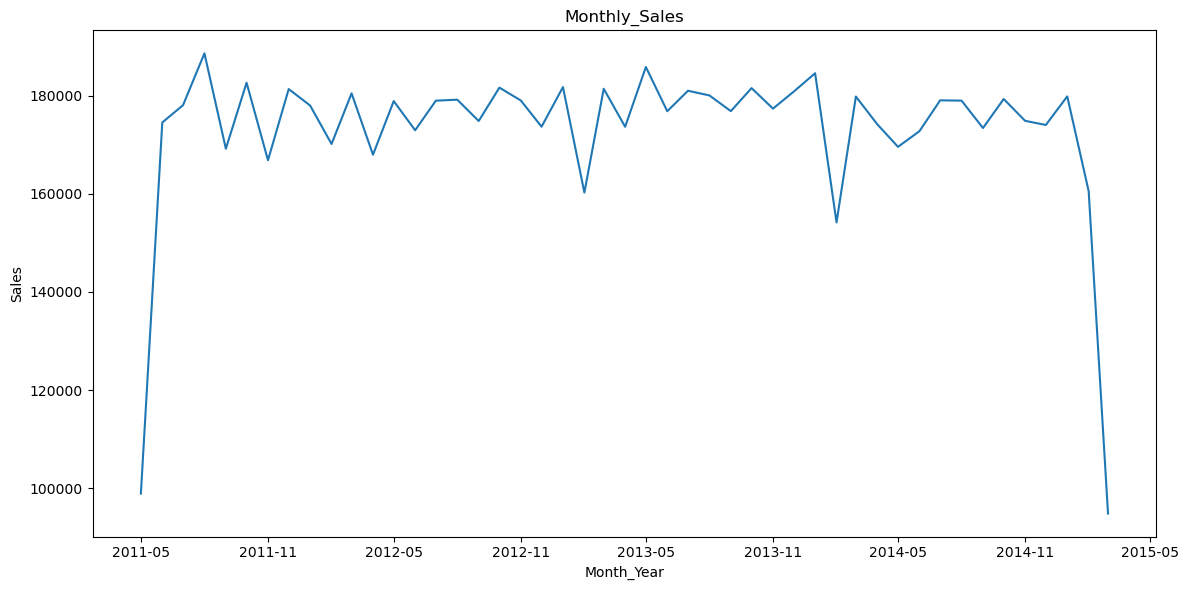

In [54]:
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month_Year')
plt.ylabel('Sales')
plt.title('Monthly_Sales')
plt.tight_layout()
plt.show()

In [69]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS4657,2015-03-16,100,0,3,2015-03
1,CS5910,2015-03-16,104,0,3,2015-03
2,CS5301,2015-03-16,97,0,3,2015-03
3,CS7291,2015-03-16,65,0,3,2015-03
4,CS1714,2015-03-16,56,0,3,2015-03


### Cohort Segmentation:

In [55]:
# Recency
recency= df.groupby('customer_id')['trans_date'].max()

# frequency

frequency= df.groupby('customer_id')['trans_date'].count()

#Monetory

monetory= df.groupby('customer_id')['tran_amount'].sum()

# Combine

rfm= pd.DataFrame({'recency':recency, 'frequency':frequency, 'monetory':monetory})
rfm

,recency,frequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [68]:
# Just to Check the recent transaction:

recent_date= df.sort_values(by='trans_date',ascending=False).reset_index(drop=True).head()
recent_date

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS4657,2015-03-16,100,0,3,2015-03
1,CS5910,2015-03-16,104,0,3,2015-03
2,CS5301,2015-03-16,97,0,3,2015-03
3,CS7291,2015-03-16,65,0,3,2015-03
4,CS1714,2015-03-16,56,0,3,2015-03


In [65]:
# Customer segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row ['frequency']>=15 and row['monetory']>1000:
        return'P0'
    elif (2010<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetory']<=1000):
        return'P1'
    else:
        return 'P2'
        
rfm['Segment']= rfm.apply(segment_customer, axis=1)
rfm

,recency,frequency,monetory,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


### Churn Analysis:

<Axes: xlabel='response'>

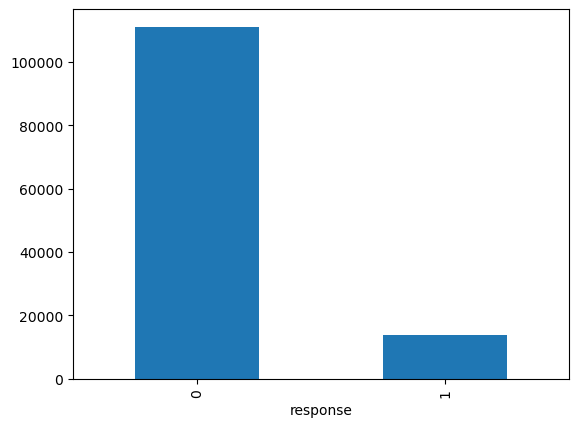

In [85]:
# Count the numbers of churned and active customers
churn_counts= df['response'].value_counts()

#Plot
churn_counts.plot(kind='bar')

# Churn: refers to the rate at which customers stop doing business with an entity(cancelling subscriptions)

### Analysing top customers

<Axes: xlabel='month_year'>

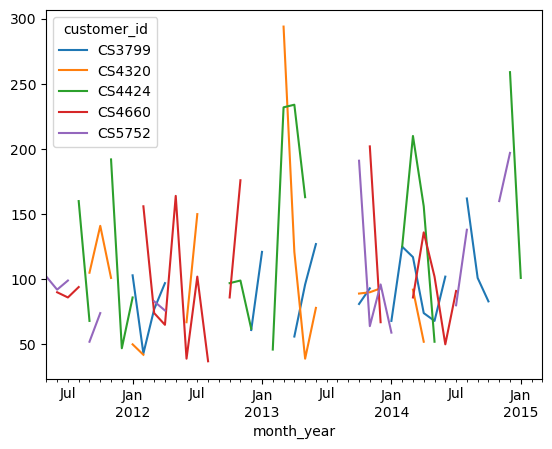

In [87]:
top_5_cus= monetory.sort_values(ascending=False).head(5).index

top_customers_df= df[df['customer_id'].isin(top_5_cus)]

top_customer_sales= top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [88]:
df.to_csv('MainData.csv')

In [89]:
rfm.to_csv('AddAnalysis.csv')